In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from Finite_volume_method_1D import *

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern",
    "figure.dpi": 200,
})

In [2]:
data_listAl = []
sim_listAl = []
comp_listAl = []
sigmas = np.linspace(0.5,5,5)
for sigma in sigmas:
    chippath = '../../DataKian/Al_LT165chip7/'
    Al_data = KID_data(chippath,
                    lambda_ph_in_nm=673,
                    KIDno=2,
                    readout_power=89,
                    temp_in_mK=120,
                    length=310,
                    T_eff=0.25,
                    N0=172e8,
                    sigma_IC=sigma,
                    D=15000)
    Al_data.fit_tail(start=500,showplots=False)
    Al_sim = KID_sim(Al_data,dt=0.1,dx_or_fraction=1/4,simtime_approx=20,method='BackwardEuler',adaptivedx=True)
    data_listAl.append(Al_data)
    sim_listAl.append(Al_sim)
    comp_listAl.append(sim_data_comp(Al_data,Al_sim))

100%|██████████| 200/200 [00:01<00:00, 124.40it/s]


In [3]:
data_listbTa = []
sim_listbTa = []
comp_listbTa = []
for sigma in sigmas:
    chippath = '../../DataKian/bTa_LT278W2chip5/'
    bTa_data = KID_data(chippath,
                        lambda_ph_in_nm=673,
                        KIDno=3,
                        readout_power=96,
                        temp_in_mK=140,
                        length=90,
                        T_eff=0.110,#0.100,
                        N0=303e8,
                        sigma_IC=sigma,
                        D=50)
    bTa_data.fit_tail(start=160,end=300,showplots=False)
    bTa_sim = KID_sim(bTa_data,dt=0.05,dx_or_fraction=1/2,simtime_approx=50,method='BackwardEuler',adaptivedx=False)
    data_listbTa.append(bTa_data)
    sim_listbTa.append(bTa_sim)
    comp_listbTa.append(sim_data_comp(bTa_data,bTa_sim))

100%|██████████| 1000/1000 [00:01<00:00, 603.43it/s]


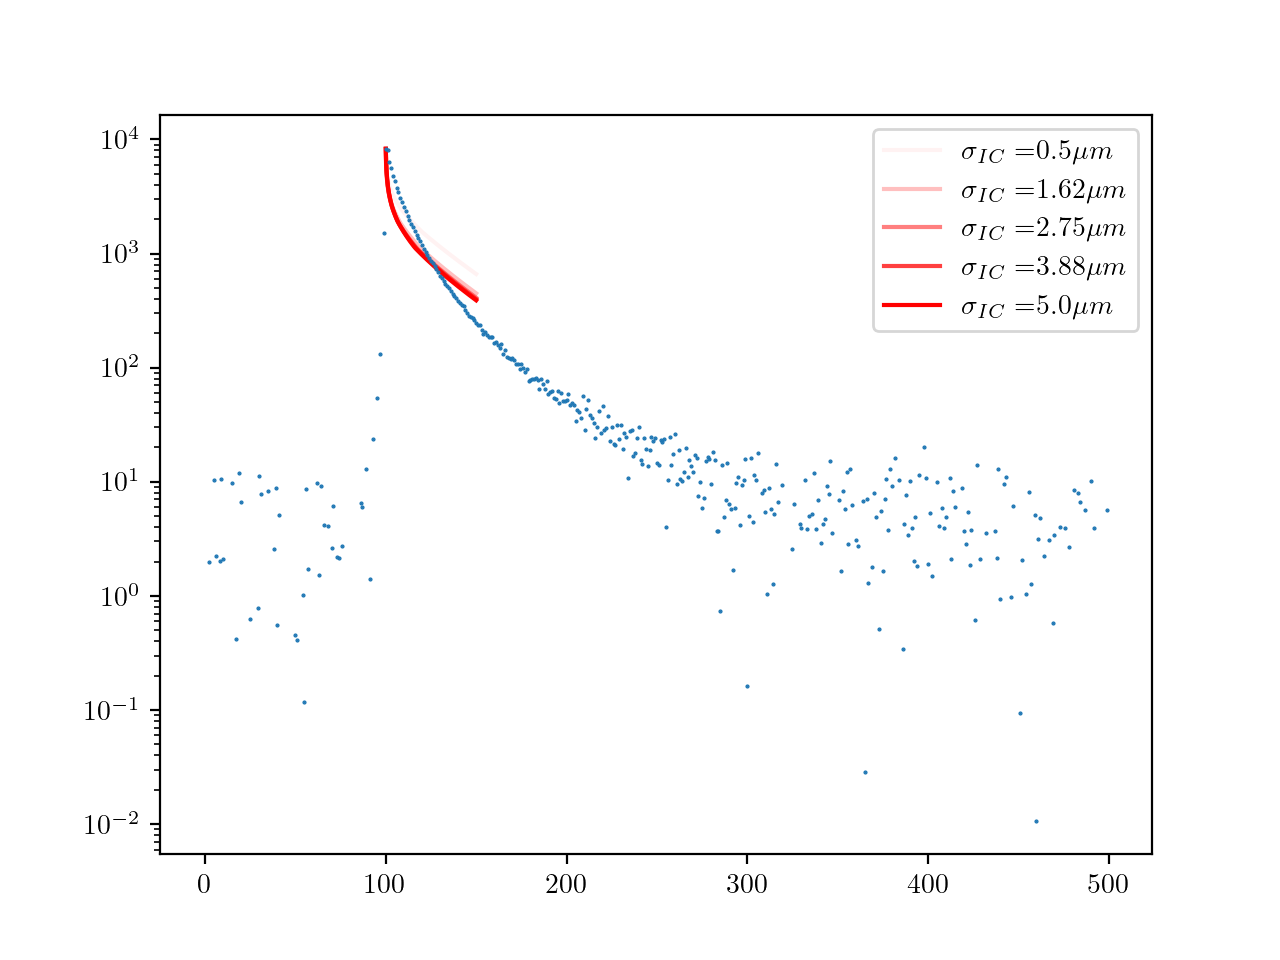

In [6]:
plt.figure()
data_list = data_listbTa
comp_list = comp_listbTa
for sigma,data,comp in zip(sigmas,data_list,comp_list):
    label = r'$\sigma_{IC} = $'+str(round(sigma,2))+r'$\mu m$'
    alpha = np.max([0.05,(sigma-np.min(sigmas))/(np.max(sigmas)-np.min(sigmas))])
    plt.semilogy(comp.t_sim_aligned,comp.Nqp_sim,color='r',alpha=alpha,label=label)
plt.semilogy(data.t_full,comp.Nqp_phase_data,ls='',marker='.',markersize=1)
plt.legend()
plt.show()